Neural Network Using Keras

A neural network is a group of interconnected units called neurons (perceptrons) that send signals to one another.

In [1]:
# The purpose of this code is to customize the settings of the matplotlib library for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


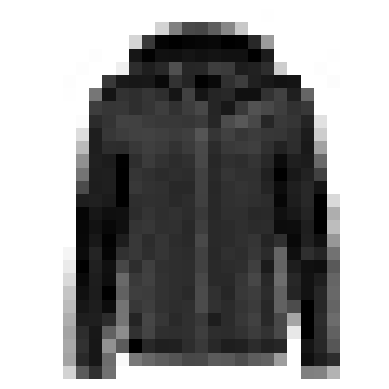

In [2]:
# Loading the Fashion MNIST dataset (From keras)
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [3]:
y_train # labels:Each number represents an item (dress, bag, T-shirt)

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
# class_names: This is a list of strings, where each entry corresponds to a category of clothing in the Fashion MNIST dataset


'Coat'

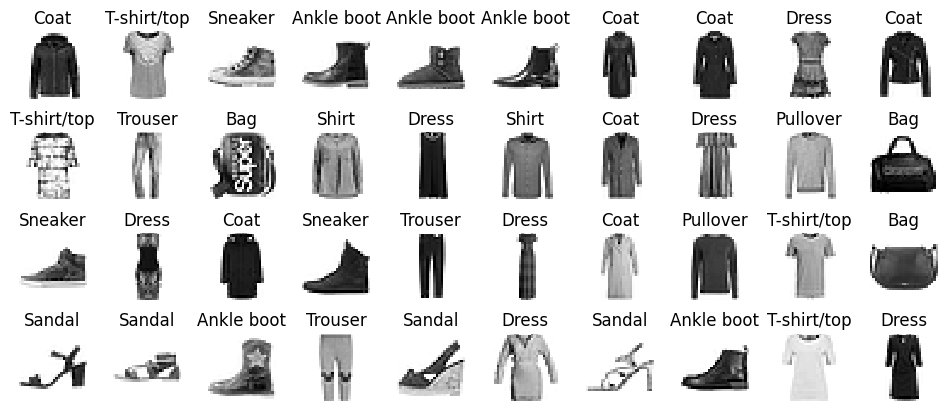

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
# The code displays a grid of images from the training set (X_train) along with their corresponding class labels (representing types of clothing).
# These images are displayed in a grid with 4 rows and 10 columns (a total of 40 images).


Sequential Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input and one output

In [6]:
model = keras.models.Sequential() # Using OOP: 'Sequential' is a class from 'keras.models', and 'model' is an object of this class
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Flattening is the first step in converting an image into a form that can be manipulated within dense (dense) layers (2D=>1D)
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
# perceptrons or neurons contain: weighted sum + bias, activation function
# the activation function: ReLU => outputs 0 for negative inputs, and linear values for positive inputs
# 300, 100, 10: number of neurons in each layer
# last layer activation function: softmax => converts raw values (logits) into probabilities, ensuring that their sum equals 1.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
import numpy as np
keras.backend.clear_session() # Clears the current Keras session to free memory and avoid conflicts when building new models.
np.random.seed(42) # Sets the random seed for NumPy to ensure reproducibility of results
tf.random.set_seed(42) # Sets the random seed for TensorFlow to ensure reproducibility of results.

Note

If the random seed is set to 0, the equation simplifies to:

output of neuron = 𝑥 𝑛 𝑤 𝑛 + bias ⇒ bias

Loss of Learning Capacity: If weights are zero, the neuron cannot learn meaningful patterns from the input data. It will always output the bias value, making training ineffective.
No Gradient Updates: In backpropagation, if weights remain zero, their gradients will also be zero, preventing the model from updating and learning properly.
Reduces Model Complexity: The network essentially becomes a constant function, which defeats the purpose of a neural network, as it won't capture any useful relationships in the data.
seed(42)

Setting a random seed is crucial for reproduction. If the neural network is rebuilt, the results will remain consistent, leading to the same accuracy.

Here, I have chosen the random seed 42 to ensure reproducibility from this specific starting point.

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # input layer
    keras.layers.Dense(300, activation="relu"), # hidden layer
    keras.layers.Dense(100, activation="relu"), # hidden layer
    keras.layers.Dense(10, activation="softmax") # output layer
])
# Add layers as list items

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Param # : Trainable params

235,500 => each neuron in Flatten (784) connect with Dense_3 (300)

relation is (*)

784 * 300 => 235,200

+300 (bias) => 235,500

30,100

300 * 100 => 30,000

+100 (bias) => 30,100

1,010

100 * 10 => 10,000

+10 (bias) =>10,010



In [11]:
hidden1 = model.layers[1]
hidden1.name
# hidden1 : part of the hidden layer

'dense'

In [12]:
model.get_layer(hidden1.name) is hidden1
# The idea is to check whether we are referring to the same layer or not within the model

True

In [13]:
weights, biases = hidden1.get_weights()
# get_weights(): This method is used to extract the weights and biases of the layer

In [14]:
weights

array([[ 0.05483688,  0.01884624,  0.04859849, ...,  0.0284277 ,
        -0.03414106, -0.03356468],
       [-0.00063915,  0.05339973, -0.02150496, ...,  0.05762237,
         0.05181466,  0.01606909],
       [-0.05662083, -0.06345902,  0.03740236, ...,  0.03168712,
        -0.01932082, -0.06144556],
       ...,
       [ 0.01800355, -0.0565751 , -0.05678242, ..., -0.00810906,
         0.02380078,  0.07167809],
       [-0.00139616,  0.03904408, -0.0610511 , ...,  0.04483106,
        -0.0601212 , -0.0649438 ],
       [-0.05390771, -0.06320462, -0.07278804, ..., -0.01414195,
         0.05301002,  0.05993214]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

Building the model

In [18]:
# model.compile:
# Purpose: Used to prepare the model for training
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
# model.fit:
# Purpose: It is used to train the model using actual data
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6851 - loss: 0.9877 - val_accuracy: 0.8180 - val_loss: 0.5221
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8245 - loss: 0.5021 - val_accuracy: 0.8420 - val_loss: 0.4587
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8416 - loss: 0.4485 - val_accuracy: 0.8536 - val_loss: 0.4261
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8525 - loss: 0.4183 - val_accuracy: 0.8588 - val_loss: 0.4057
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8593 - loss: 0.3966 - val_accuracy: 0.8618 - val_loss: 0.3891
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.3793 - val_accuracy: 0.8662 - val_loss: 0.3762
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8696 - loss: 0.3651 - val_accuracy: 0.8712 - val_loss: 0.3666
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8736 - loss: 0.353

loss function & metrics

loss function : During training

metrics : During validation or testing

Epoch 1 : Sequence

forward pass => prediction - label (loss function) => Backpropagation (Editing on Neural Network) =>

=> validation dataset

forward pass => prediction - label (metrics) : (accuracy)

Epoch 2 , Epoch 3 ...

Question : Why was Accuracy calculated during training ?

analysis overfitting | underfitting status




---

Epoch 30/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9198 - loss: 0.2267 - val_accuracy: 0.8918 - val_loss: 0.3079

accuracy : training dataset accuracy

loss : Cross-Entropy : (training dataset) loss function used in machine learning to measure the performance of a classification model

val_accuracy : metrics : accuracy on validation dataset

val_loss : Cross-Entropy : (validation dataset)



---



As training progresses (with more epochs), the accuracy on the training dataset (accuracy)and the validation dataset (val_accuracy) become closer.

This indicates that the model is generalizing better and reducing overfitting.


In [20]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

verbose : The amount of detail that will appear during training

example :

1719 => number of example for each epoch (steps)


In [21]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [22]:
history.history.keys()
# metrics & loss function

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

visiualizing

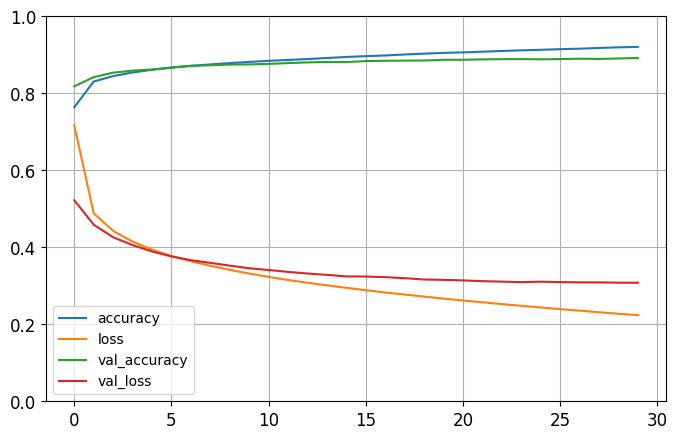

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

x-axis : epochs

y-axis : errors



In [24]:
model.evaluate(X_test,y_test)
# It is used to evaluate the model on test data after training the model. This command calculates loss and accuracy on test data that is not used for training or validation.
# This shows you how well the model can generalize to new data that it has never seen before.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.3466


[0.34464094042778015, 0.8784999847412109]

softmax layer

Softmax function is used in classification to convert raw values ​​(logits) into probabilities, so that their sum is 1. It is used when the classes are dissimilar, and helps the model choose the most likely class. During training, the weights are adjusted based on the error, which affects the results produced by Softmax.

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

10 classes , each class its own probability is shown

sum of the probabilites = 1 (note that i use (round)),so it's Approximate results


In [26]:
y_pred = np.argmax(model.predict(X_new),axis =-1)
y_pred
# When np.argmax is applied to the matrix generated by model.predict(), the class with the highest probability is chosen for each example in X_new.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([9, 2, 1])

In [27]:
class_names[y_pred[0]]

'Ankle boot'

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3] # slicing
y_new
# y_new will be an array containing the first 3 values ​​of y_test

array([9, 2, 1], dtype=uint8)

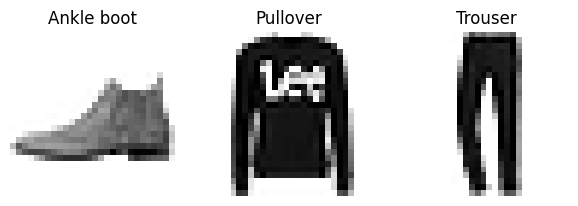

In [30]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()